In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100000)

pd.set_option('display.max_colwidth', -1)
sns.set(style="white", context="talk")

%matplotlib inline
from ipywidgets import interact

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [6]:
! pip install openpyxl 

  Using cached openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


### Importing the data and checking the unique count

In [328]:
'Importing data'
import openpyxl
data= pd.read_csv('uk_data_with_exposure.csv') 


Columns (21) have mixed types.Specify dtype option on import or set low_memory=False.


In [329]:
data.head(1)

,Unnamed: 0,Vehicle Type,Manufacturer,Model,Series,Nominal Start Year,Production End Year,TVI Code,abi_code,Start Date,End Date,Body Style,Number Of Doors,Aspiration Type,Cubic Capacity,Drive Type,Transmission Type,Trim Level,Engine Label,Wheel Base Type,Wheel Base Length,Roof Height Type,Security Category,Number Of Seats,Total Height,Total Length,Total Width,Kerb Weight,Gross Weight,Max Payload,Torque,Max Speed,Acceleration,Power Output,Primary Fuel Type,Secondary Fuel Type,ABI Description,Vehicle Import Type,AEB Type,List Price,Enhanced Vehicle Description,Battery Lease,CO2 Emissions G/KM,Electric Vehicle Type,co2_flag,INFORCE,MARKET_QTY
0,0,Car,SSANGYONG,TIVOLI XLV,1,2016,NaN,SS2120,104660,2016-09-01,NaN,5 Door Estate,5.0,Turbo with Intercooler,1597.0,2WD,AUTOMATIC,ELX,e-XDi,MEDIUM WHEELBASE,NaN,NaN,T2,5.0,1635.0,4440.0,1798.0,1425.0,1970.0,NaN,221.0,108.0,11.6,113.0,DIESEL,NaN,NaN,NaN,No,19250.0,Tivoli XLV ELX e-XDi 113bhp 5 Door Estate Diesel Automatic 2WD,N,154.0,NaN,3-Platinum,19,229


In [331]:
print("Overall count of Manufacturer : ",data['Manufacturer'].count())
print("Unique Manufacturer : ", data['Manufacturer'].nunique())

Overall count of Manufacturer :  17856
Unique Manufacturer :  68


In [332]:
"""Checking the Distribution of Manufacturers"""

Manufacturer_data= pd.pivot_table(data,index=["Manufacturer"],values=["Vehicle Type"],      
                        aggfunc={"Vehicle Type":len})


Manufacturer_data =Manufacturer_data.nlargest(10,['Vehicle Type'])
Manufacturer_data= Manufacturer_data[:10]
Manufacturer_data
Manufacturer_data.reset_index(inplace=True)
Manufacturer_data

,Manufacturer,Vehicle Type
0,MERCEDES-BENZ,1937
1,AUDI,1705
2,SKODA,1570
3,FORD,1241
4,VOLKSWAGEN,1236
5,BMW,1009
6,VAUXHALL,872
7,SEAT,774
8,LAND ROVER,723
9,PEUGEOT,701


In [333]:
data.shape

(17856, 47)

### Top 10 Manufactures according to the count

Text(0.5, 1.0, 'Top 10 Manufacturers')

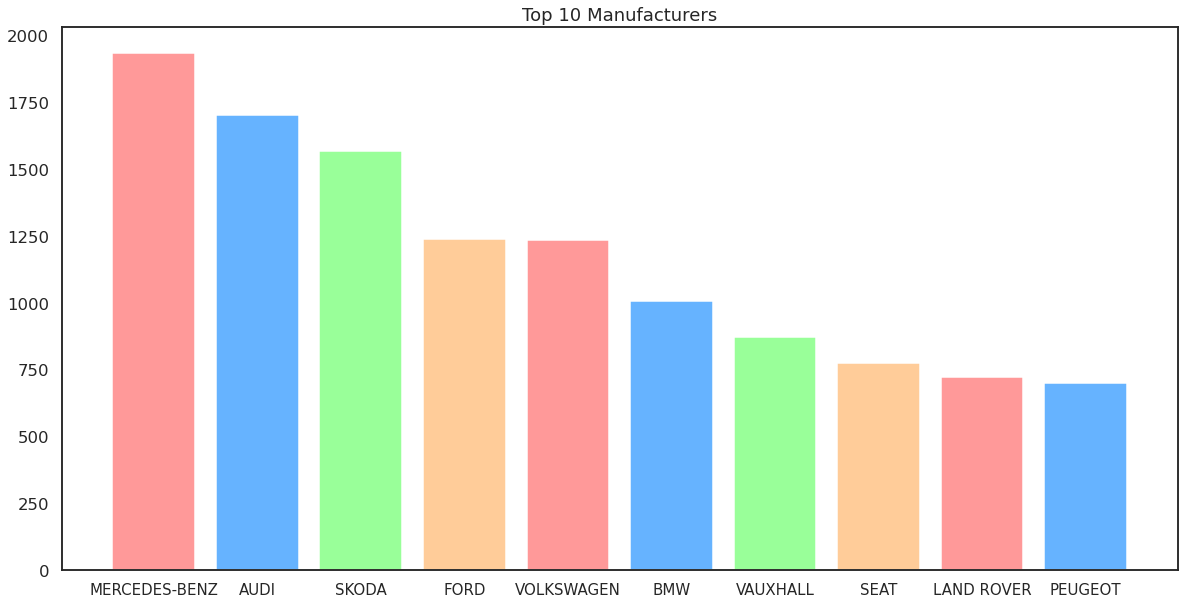

In [334]:
fig, ax1 = plt.subplots(figsize=(20,10))
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
plt.bar(Manufacturer['Manufacturer'],Manufacturer['Vehicle Type'],color=colors)
plt.title("Top 10 Manufacturers")

In [335]:
data['Nominal Start Year'] = data['Nominal Start Year'].astype(str)
data = data[(data['Nominal Start Year']!='nan')]
data.shape

(17856, 47)

In [336]:
data['Production End Year'] = data['Production End Year'].astype(str)
data_1 = data[(data['Production End Year']!='nan')]
data_1.shape

(7917, 47)

In [337]:
data_1.head(2)

,Unnamed: 0,Vehicle Type,Manufacturer,Model,Series,Nominal Start Year,Production End Year,TVI Code,abi_code,Start Date,End Date,Body Style,Number Of Doors,Aspiration Type,Cubic Capacity,Drive Type,Transmission Type,Trim Level,Engine Label,Wheel Base Type,Wheel Base Length,Roof Height Type,Security Category,Number Of Seats,Total Height,Total Length,Total Width,Kerb Weight,Gross Weight,Max Payload,Torque,Max Speed,Acceleration,Power Output,Primary Fuel Type,Secondary Fuel Type,ABI Description,Vehicle Import Type,AEB Type,List Price,Enhanced Vehicle Description,Battery Lease,CO2 Emissions G/KM,Electric Vehicle Type,co2_flag,INFORCE,MARKET_QTY
10,10,Car,SSANGYONG,KORANDO,2,2017,2019.0,SS2161,104685,2017-05-01,2019-08-31,5 Door Hatchback,5.0,Turbo with Intercooler,2157.0,2WD,MANUAL,SE,D22DTF,MEDIUM WHEELBASE,NaN,NaN,T2,5.0,1710.0,4410.0,1830.0,1743.0,2210.0,NaN,295.0,115.0,9.6,176.0,DIESEL,NaN,NaN,NaN,No,17000.0,Korando SE D22DTF 176bhp 5 Door Hatchback Diesel Manual 2WD,N,155.0,NaN,3-Platinum,23,269
11,11,Car,SSANGYONG,KORANDO,2,2017,2019.0,SS2162,104686,2017-05-01,2019-08-31,5 Door Hatchback,5.0,Turbo with Intercooler,2157.0,2WD,MANUAL,LE,D22DTF,MEDIUM WHEELBASE,NaN,NaN,T2,5.0,1710.0,4410.0,1830.0,1743.0,2210.0,NaN,295.0,115.0,9.6,176.0,DIESEL,NaN,NaN,NaN,No,18370.0,Korando LE D22DTF 176bhp 5 Door Hatchback Diesel Manual 2WD,N,155.0,NaN,3-Platinum,57,490


In [338]:
data_1['Start Date'] = pd.to_datetime(data_1['Start Date'], errors='coerce')
data_1['End Date'] = pd.to_datetime(data_1['End Date'], errors='coerce')



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [339]:
data_1['Start Date']=data_1['Start Date'].astype('datetime64[ns]')
data_1['End Date']=data_1['End Date'].astype('datetime64[ns]')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [340]:
data_1['Average_days_of_starting_Production_to_end'] = (data_1['End Date']-data_1['Start Date']).dt.days


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [341]:
data_1['Average_days_of_starting_Production_to_end'] 

10       852.0 
11       852.0 
12       852.0 
13       852.0 
14       852.0 
15       852.0 
16       852.0 
17       1246.0
18       1246.0
19       1246.0
20       1246.0
21       1246.0
22       426.0 
23       426.0 
25       1.0   
26       1.0   
28       546.0 
29       546.0 
30       546.0 
31       546.0 
32       546.0 
33       546.0 
34       546.0 
35       211.0 
38       622.0 
39       181.0 
40       181.0 
41       181.0 
42       181.0 
43       181.0 
70       1094.0
71       1094.0
72       1094.0
73       1094.0
74       1094.0
75       1094.0
76       1094.0
77       1094.0
78       1094.0
79       1094.0
80       1094.0
81       1094.0
82       1094.0
83       1094.0
84       1094.0
85       1094.0
86       1094.0
87       1094.0
88       1094.0
89       1094.0
110      304.0 
111      813.0 
112      304.0 
113      328.0 
116      328.0 
127      536.0 
164      1155.0
165      1155.0
166      1094.0
167      1094.0
168      1155.0
169      1155.0
170     

## TOP 10 Manufacturers and its average Co2 emission

In [346]:
"""Checking the Distribution of Manufacturers"""

Manufacturer_data= pd.pivot_table(data,index=["Manufacturer"],values=["Vehicle Type","CO2 Emissions G/KM"],      
                        aggfunc={"Vehicle Type":len,"CO2 Emissions G/KM":np.mean})


Manufacturer_data =Manufacturer_data.nlargest(10,['Vehicle Type'])
Manufacturer_data= Manufacturer_data[:10]
Manufacturer_data
Manufacturer_data.reset_index(inplace=True)
Manufacturer_data

,Manufacturer,CO2 Emissions G/KM,Vehicle Type
0,MERCEDES-BENZ,144.898810,1937
1,AUDI,144.268666,1705
2,SKODA,131.163279,1570
3,FORD,134.654867,1241
4,VOLKSWAGEN,130.415110,1236
5,BMW,138.888664,1009
6,VAUXHALL,128.772559,872
7,SEAT,132.817945,774
8,LAND ROVER,193.505714,723
9,PEUGEOT,114.514610,701


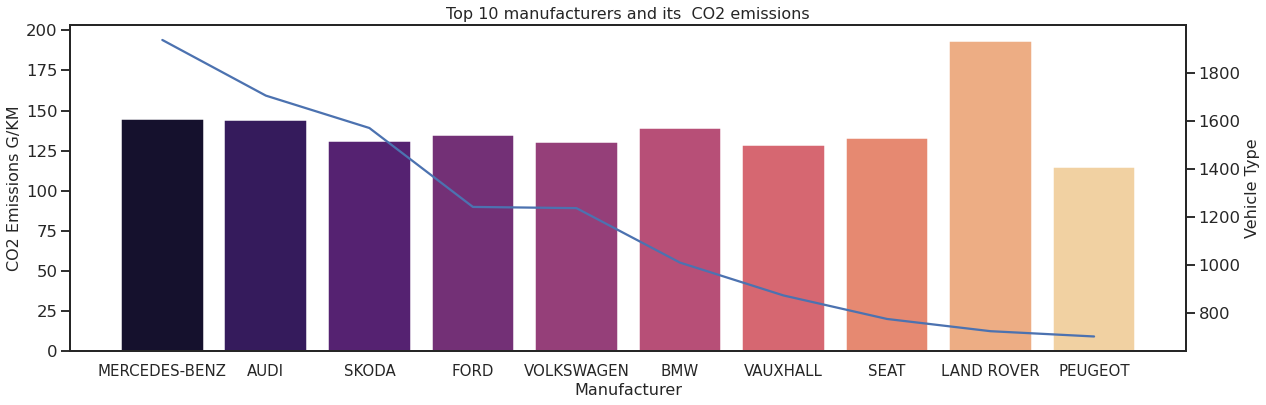

In [348]:
fig, ax1 = plt.subplots(figsize=(20,6))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Top 10 manufacturers and its  CO2 emissions', fontsize=16)
ax1.set_xlabel('Manufacturer', fontsize=16)
ax1.set_ylabel('CO2 Emissions G/KM	', fontsize=16)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='CO2 Emissions G/KM', data = Manufacturer_data,palette='magma')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Vehicle Type', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='Vehicle Type', data = Manufacturer_data, sort=False,palette='magma')
ax2.tick_params(axis='y')

plt.show()

## Life cycle of each manufacturer and the average price list

In [212]:
"""Life_cycle of Manufacturer""



lifecycle = pd.pivot_table(data_1,index=['Manufacturer'], values=["Vehicle Type","Average_days_of_starting_Production_to_end","List Price"],
                           aggfunc={'Vehicle Type':len,"Average_days_of_starting_Production_to_end":np.mean,"List Price":np.mean,})
lifecycle=lifecycle.reset_index('Manufacturer')
lifecycle =lifecycle.nlargest(10,['Vehicle Type'])
lifecycle

,Manufacturer,Average_days_of_starting_Production_to_end,List Price,Vehicle Type
30,SKODA,366.257576,25155.662374,792
21,MERCEDES-BENZ,704.567639,51792.079681,754
9,FORD,656.747678,24609.866563,646
38,VOLKSWAGEN,737.633127,26317.753488,646
1,AUDI,631.085386,32710.581281,609
37,VAUXHALL,889.466797,24220.513672,512
3,BMW,967.137177,40735.100200,503
29,SEAT,658.418660,24087.158273,418
26,PEUGEOT,712.134868,25292.788779,304
16,KIA,820.193309,24288.022388,269


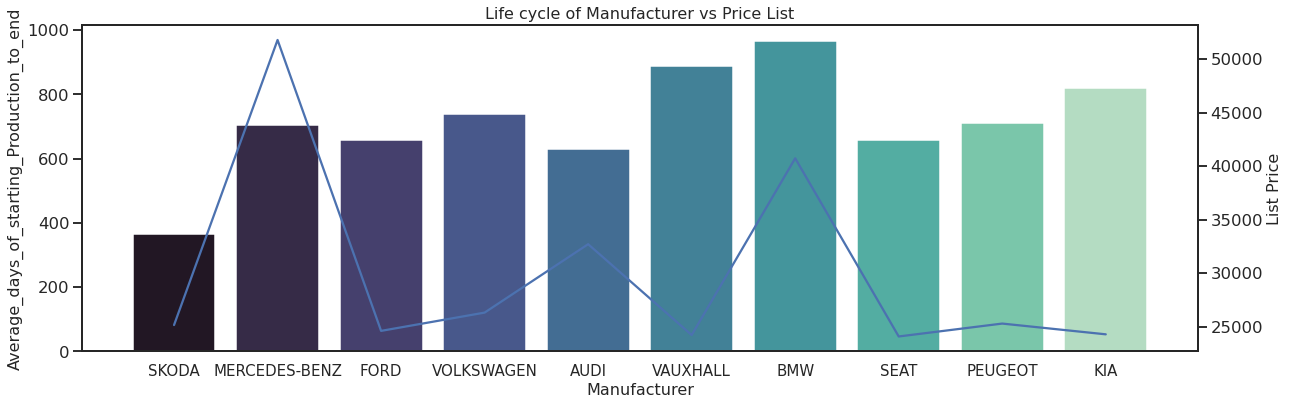

In [342]:
fig, ax1 = plt.subplots(figsize=(20,6))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Life cycle of Manufacturer vs Price List', fontsize=16)
ax1.set_xlabel('Manufacturer', fontsize=16)
ax1.set_ylabel('Average_days_of_starting_Production_to_end', fontsize=16)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='Average_days_of_starting_Production_to_end', data = lifecycle,palette='mako')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('List Price', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='List Price', data = lifecycle, sort=False,palette='mako')
ax2.tick_params(axis='y')

plt.show()

### Make-model distribution accoring to the CO2 Emission

In [350]:
make_model = pd.pivot_table(data,index=['Manufacturer','Model'], values=["Vehicle Type","CO2 Emissions G/KM"],
                           aggfunc={'Vehicle Type':len,"CO2 Emissions G/KM":np.mean,})
make_model=make_model.reset_index('Manufacturer')
make_model =make_model.nlargest(10,['Vehicle Type'])
make_model.reset_index(inplace=True)
make_model['Manufacturer_Model'] = make_model['Manufacturer'].astype(str) + '_' + make_model['Model'].astype(str)
make_model
make_model

,Model,Manufacturer,CO2 Emissions G/KM,Vehicle Type,Manufacturer_Model
0,FOCUS,FORD,114.304158,490,FORD_FOCUS
1,A3,AUDI,124.151111,451,AUDI_A3
2,OCTAVIA,SKODA,121.743902,418,SKODA_OCTAVIA
3,C CLASS,MERCEDES-BENZ,146.549451,364,MERCEDES-BENZ_C CLASS
4,E CLASS,MERCEDES-BENZ,163.506494,319,MERCEDES-BENZ_E CLASS
5,A CLASS,MERCEDES-BENZ,133.567742,310,MERCEDES-BENZ_A CLASS
6,A5,AUDI,140.755102,294,AUDI_A5
7,GOLF,VOLKSWAGEN,117.699647,285,VOLKSWAGEN_GOLF
8,LEON,SEAT,124.864769,283,SEAT_LEON
9,KAROQ,SKODA,141.537037,270,SKODA_KAROQ


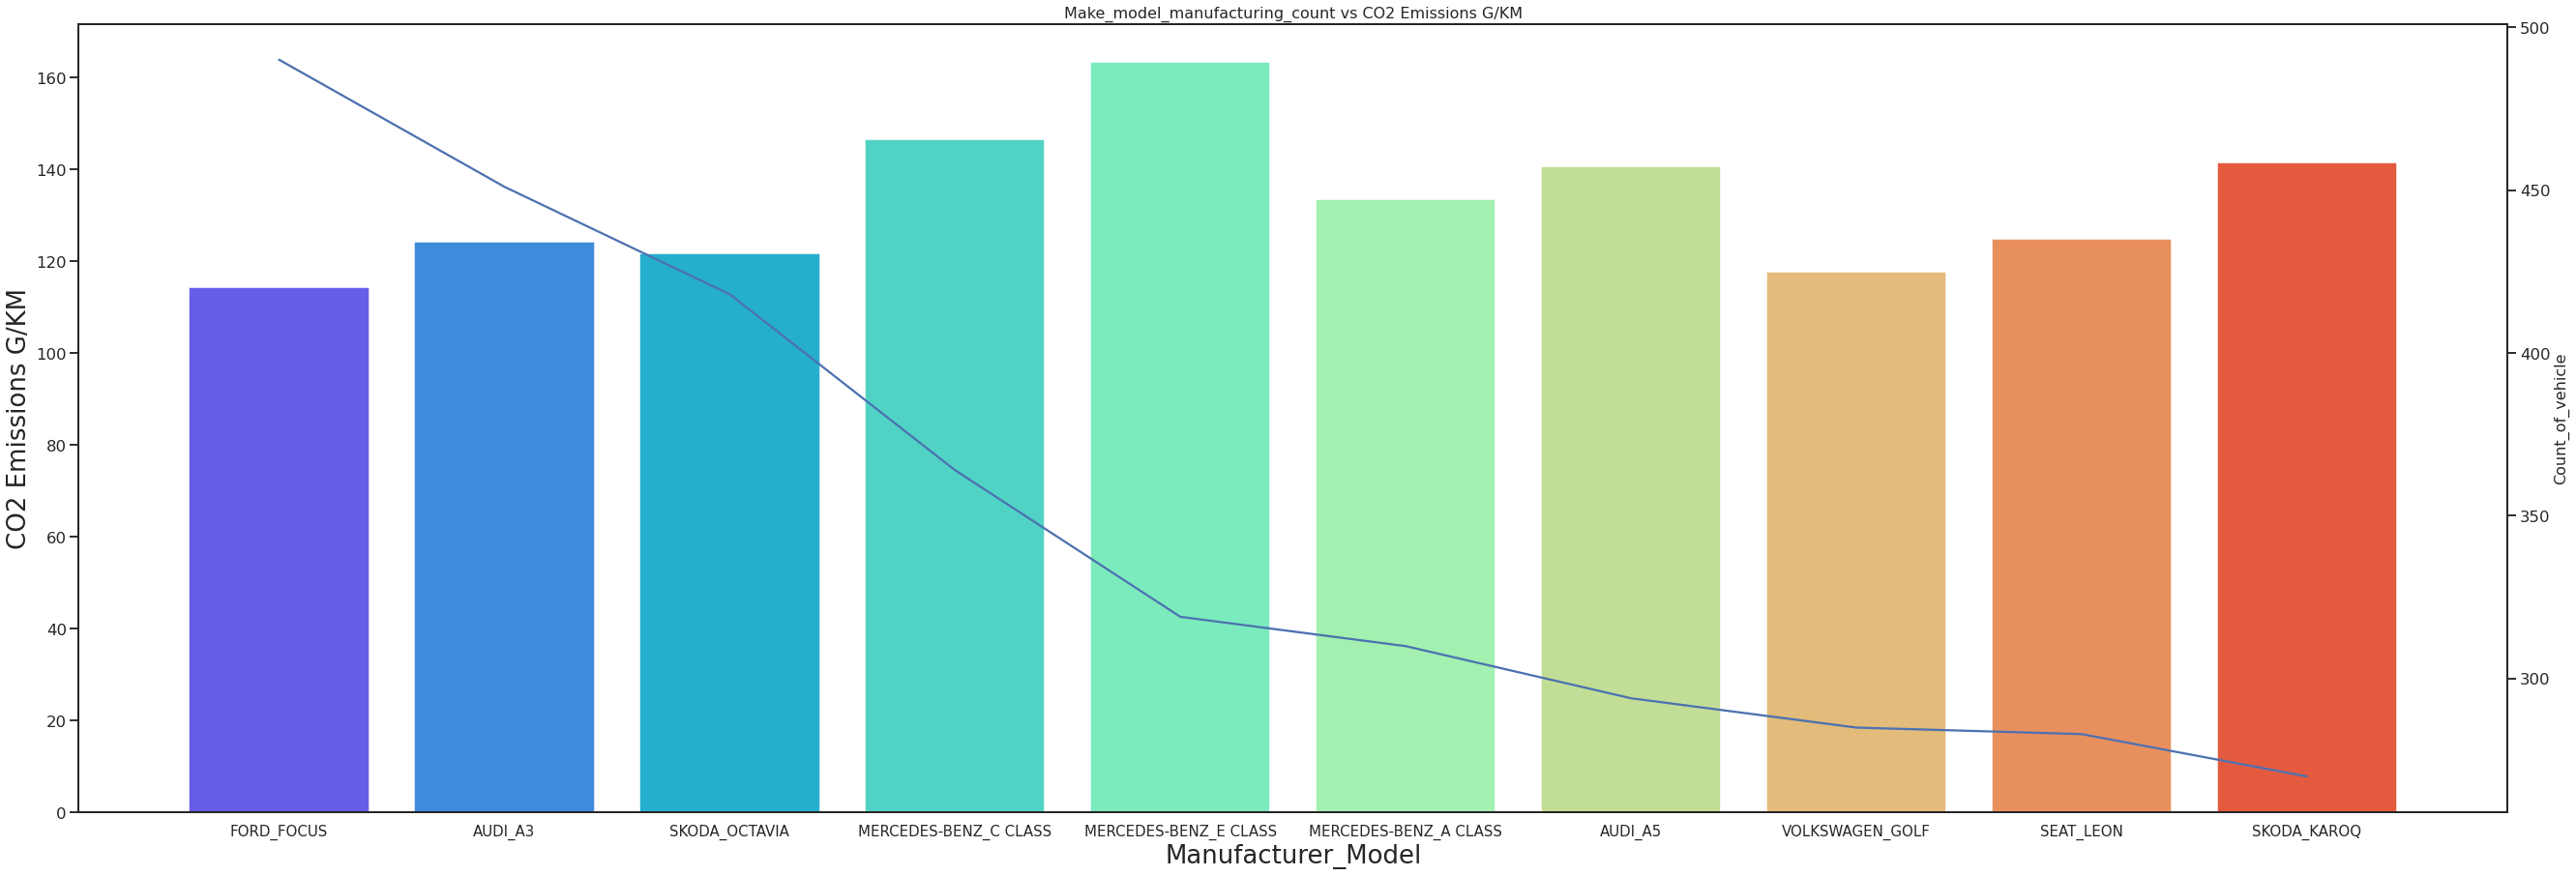

In [351]:
fig, ax1 = plt.subplots(figsize=(45,15))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Make_model_manufacturing_count vs CO2 Emissions G/KM', fontsize=16)
ax1.set_xlabel('Manufacturer_Model', fontsize=26)
ax1.set_ylabel('List Price', fontsize=26)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer_Model', y='CO2 Emissions G/KM', data = make_model,palette='rainbow')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Count_of_vehicle', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer_Model', y='Vehicle Type', data = make_model, sort=False,palette='rainbow')
ax2.tick_params(axis='y')

plt.show()

### Top 10 Manufacturers having highest CO2 emission

In [364]:
make_model_2 = pd.pivot_table(data,index=['Manufacturer','co2_flag'], values=["Vehicle Type","CO2 Emissions G/KM"],
                           aggfunc={'Vehicle Type':len,"CO2 Emissions G/KM":np.mean,})
make_model_2=make_model_2.reset_index('Manufacturer')
make_model_2 =make_model_2.nlargest(10,['CO2 Emissions G/KM'])
make_model_2.reset_index(inplace=True)
#make_model_2['Manufacturer_Model'] = make_model_2['Manufacturer'].astype(str) + '_' + make_model_2['Model'].astype(str)
make_model_2
make_model_2

,co2_flag,Manufacturer,CO2 Emissions G/KM,Vehicle Type
0,4-High,GARDNER DOUGLAS,999.000000,1
1,4-High,LAMBORGHINI,372.571429,7
2,4-High,ROLLS-ROYCE,349.230769,13
3,4-High,FERRARI,292.947368,19
4,4-High,ASTON MARTIN,287.750000,24
5,4-High,BENTLEY,287.333333,18
6,4-High,MCLAREN,259.470588,17
7,4-High,MASERATI,258.652174,23
8,4-High,CHEVROLET,242.333333,12
9,4-High,LEXUS,238.708333,24


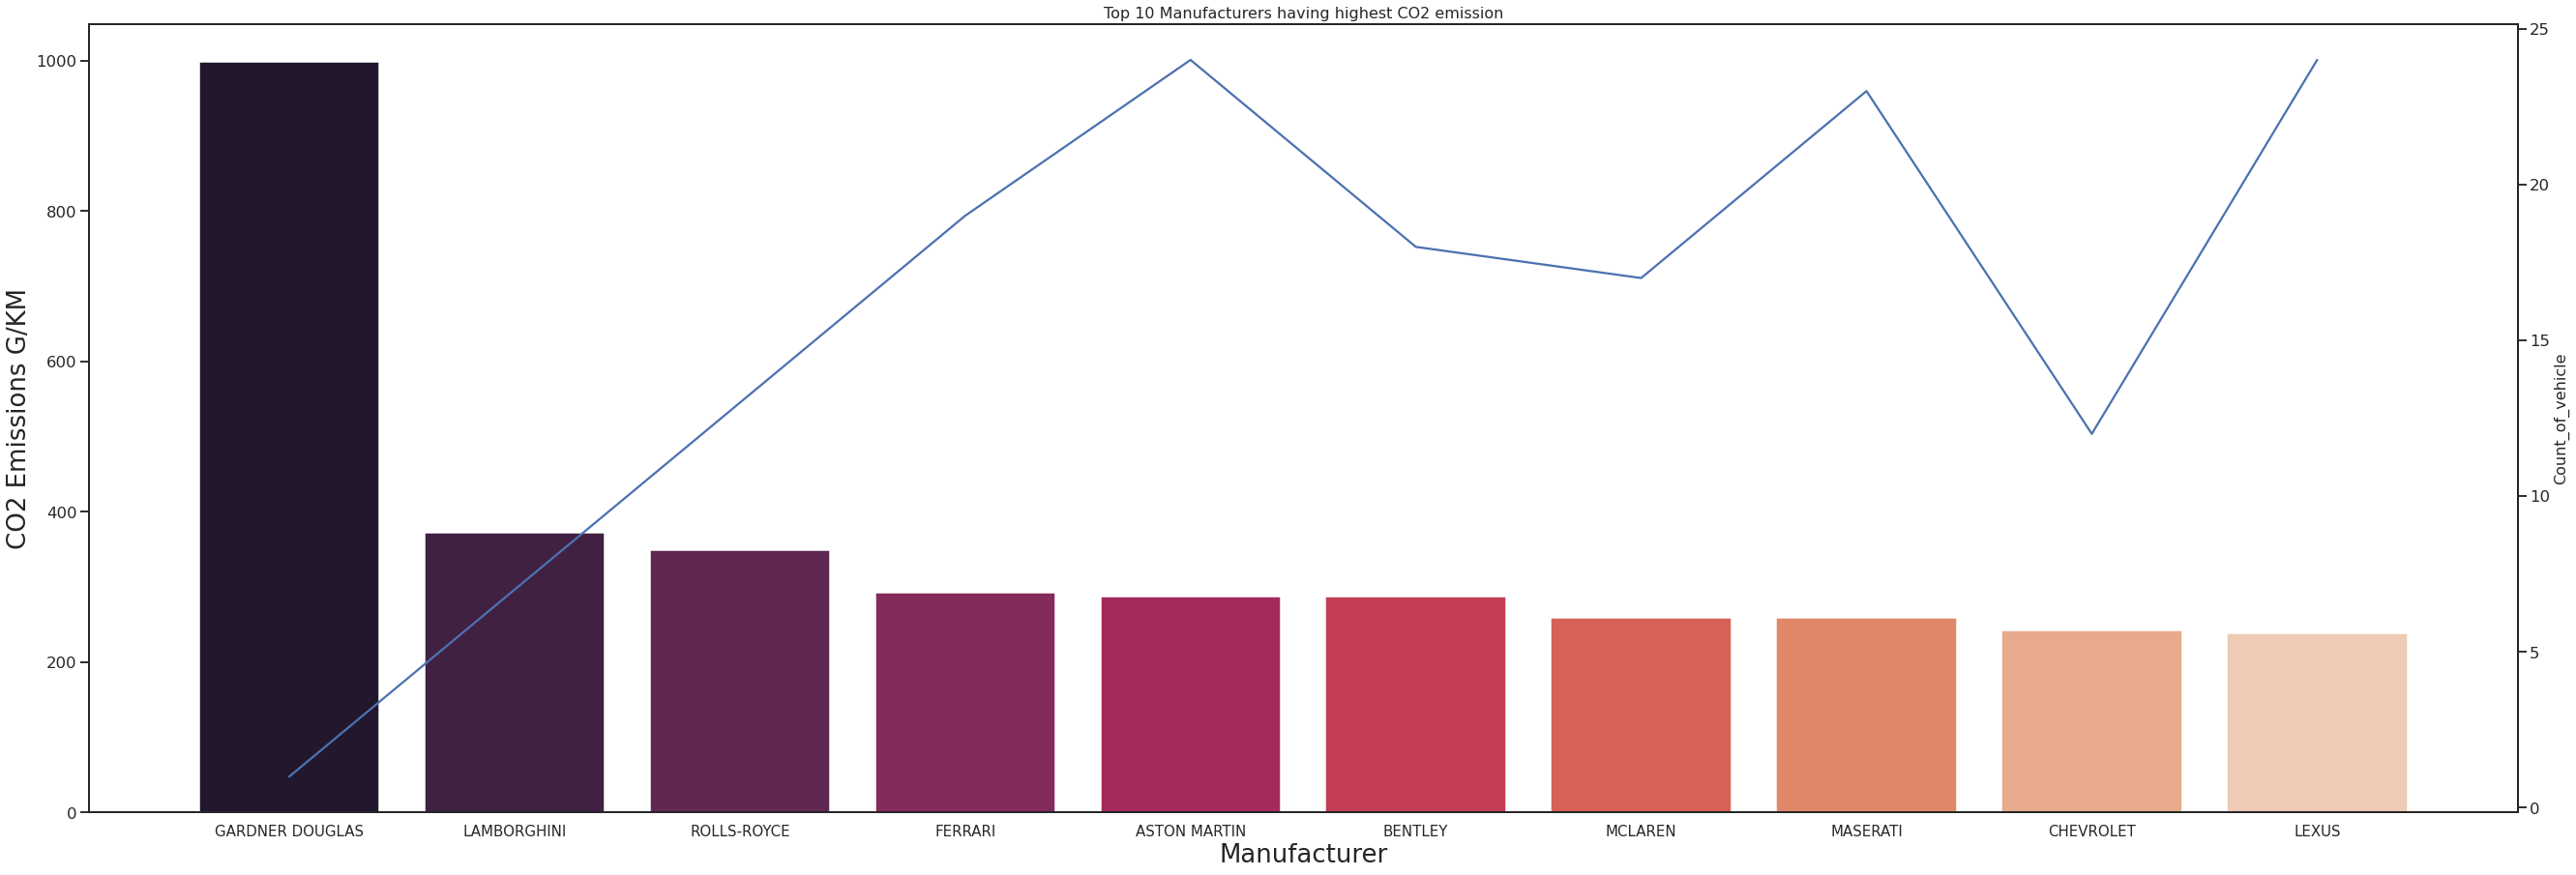

In [365]:
fig, ax1 = plt.subplots(figsize=(45,15))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Top 10 Manufacturers having highest CO2 emission', fontsize=16)
ax1.set_xlabel('Manufacturerl', fontsize=26)
ax1.set_ylabel('CO2 Emissions G/KM', fontsize=26)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='CO2 Emissions G/KM', data = make_model_2,palette='rocket')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Count_of_vehicle', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='Vehicle Type', data = make_model_2, sort=False,palette='rocket')
ax2.tick_params(axis='y')

plt.show()

### Top 10 Manufacturers having least CO2 emission

In [366]:
make_model_3 = pd.pivot_table(data,index=['Manufacturer','co2_flag'], values=["Vehicle Type","CO2 Emissions G/KM"],
                           aggfunc={'Vehicle Type':len,"CO2 Emissions G/KM":np.mean,})
make_model_3=make_model_3.reset_index('Manufacturer')
make_model_3 =make_model_3.nsmallest(10,['CO2 Emissions G/KM'])
make_model_3.reset_index(inplace=True)
#make_model_2['Manufacturer_Model'] = make_model_2['Manufacturer'].astype(str) + '_' + make_model_2['Model'].astype(str)
make_model_3
make_model_3

,co2_flag,Manufacturer,CO2 Emissions G/KM,Vehicle Type
0,0-Very-Low,GENESIS,1.000000,1
1,0-Very-Low,SUBARU,1.000000,2
2,0-Very-Low,LEVC,19.000000,1
3,0-Very-Low,POLESTAR,30.000000,1
4,0-Very-Low,JAGUAR,37.714286,7
5,0-Very-Low,MG MOTORS UK,43.000000,2
6,0-Very-Low,JEEP,47.750000,4
7,0-Very-Low,LAND ROVER,52.387755,49
8,0-Very-Low,VOLVO,55.813725,102
9,0-Very-Low,MCLAREN,60.000000,2


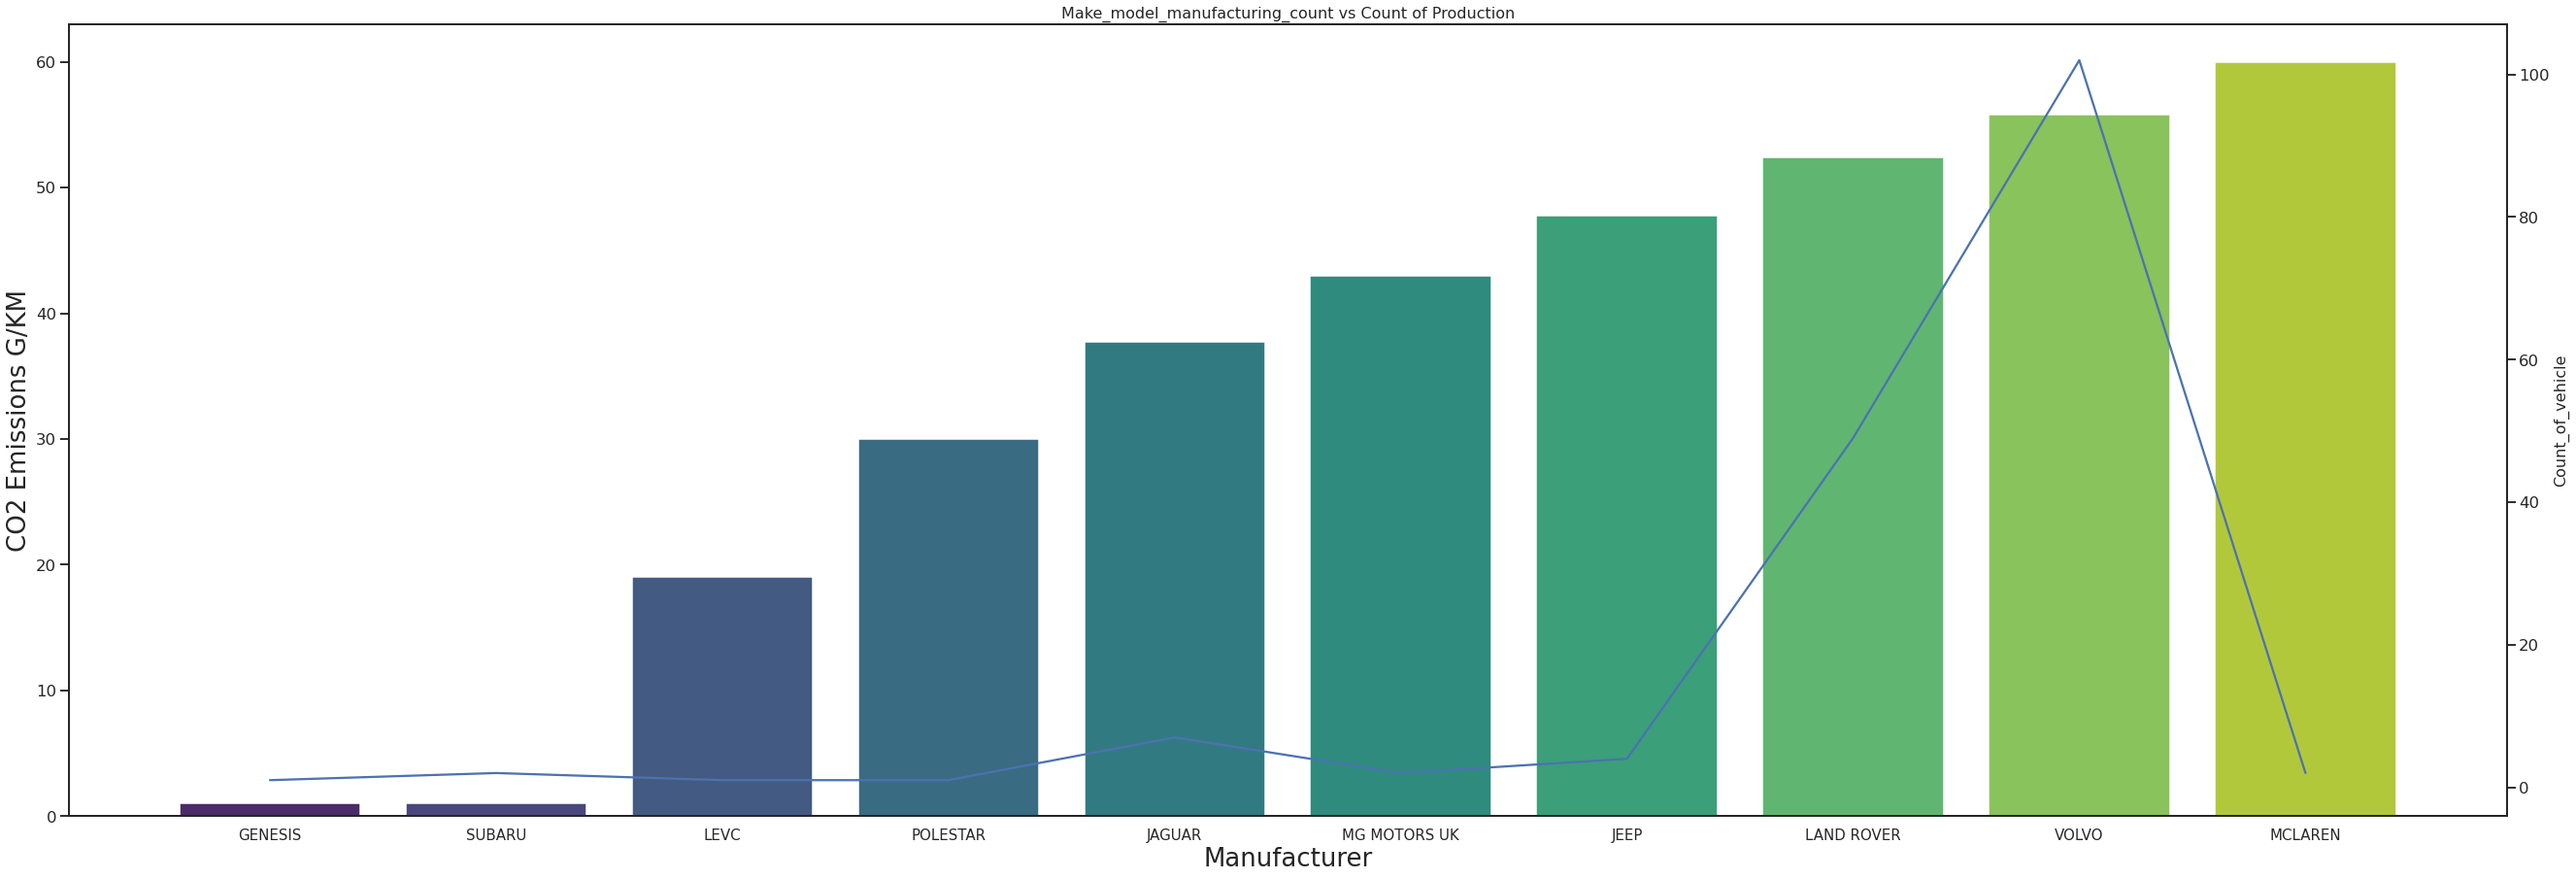

In [368]:
fig, ax1 = plt.subplots(figsize=(45,15))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Make_model_manufacturing_count vs Count of Production', fontsize=16)
ax1.set_xlabel('Manufacturer', fontsize=26)
ax1.set_ylabel('CO2 Emissions G/KM', fontsize=26)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='CO2 Emissions G/KM', data = make_model_3,palette='viridis')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Count_of_vehicle', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='Vehicle Type', data = make_model_3, sort=False,palette='viridis')
ax2.tick_params(axis='y')

plt.show()

### Average Co2 emission by Fuel type

In [311]:




fuel_type = pd.pivot_table(data,index=['Primary Fuel Type'], values=["CO2 Emissions G/KM","Vehicle Type"],
                           aggfunc={'Vehicle Type':len,"CO2 Emissions G/KM":np.mean,})
fuel_type=fuel_type.reset_index('Primary Fuel Type')
fuel_type =fuel_type.nlargest(10,['CO2 Emissions G/KM'])
fuel_type.reset_index(inplace=True)
#make_model_2['Manufacturer_Model'] = make_model_2['Manufacturer'].astype(str) + '_' + make_model_2['Model'].astype(str)
fuel_type
fuel_type

,index,Primary Fuel Type,CO2 Emissions G/KM,Vehicle Type
0,3,PETROL,141.087873,10135
1,0,DIESEL,136.719746,7075
2,1,ELECTRIC,39.933333,644


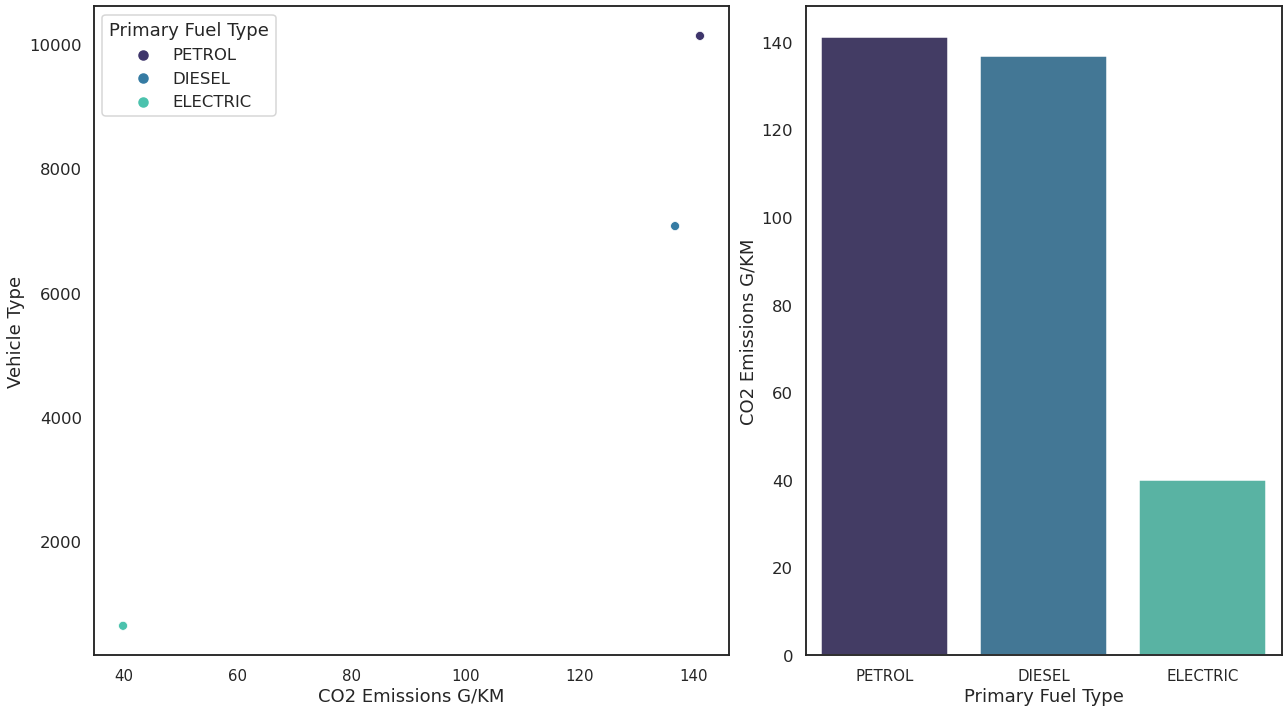

In [327]:
f, axs = plt.subplots(1, 2, figsize=(18, 10), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=fuel_type, x="CO2 Emissions G/KM", y="Vehicle Type", hue="Primary Fuel Type",palette='mako' ,ax=axs[0])
sns.barplot(data=fuel_type, x="Primary Fuel Type",y="CO2 Emissions G/KM",palette='mako',ax=axs[1])
f.tight_layout()

### Average Emission by Engine capacity

In [375]:
Engine_capacity = pd.pivot_table(data,index=['Manufacturer'], values=["CO2 Emissions G/KM","Cubic Capacity"],
                           aggfunc={'Cubic Capacity':np.mean,"CO2 Emissions G/KM":np.mean,})
Engine_capacity=Engine_capacity.reset_index('Manufacturer')
Engine_capacity =Engine_capacity.nlargest(10,['Cubic Capacity'])
Engine_capacity.reset_index(inplace=True)
#make_model_2['Manufacturer_Model'] = make_model_2['Manufacturer'].astype(str) + '_' + make_model_2['Model'].astype(str)
Engine_capacity
Engine_capacity

,index,Manufacturer,CO2 Emissions G/KM,Cubic Capacity
0,7,BUGATTI,NaN,7993.000000
1,48,ROLLS-ROYCE,349.230769,6724.846154
2,18,GARDNER DOUGLAS,999.000000,6162.000000
3,29,LAMBORGHINI,372.571429,5425.714286
4,28,KOENIGSEGG,NaN,5000.000000
5,54,TORNADO,150.000000,5000.000000
6,9,CHEVROLET,242.333333,4972.285714
7,3,ASTON MARTIN,287.750000,4738.333333
8,15,FERRARI,292.947368,4666.526316
9,5,BENTLEY,235.166667,4549.833333


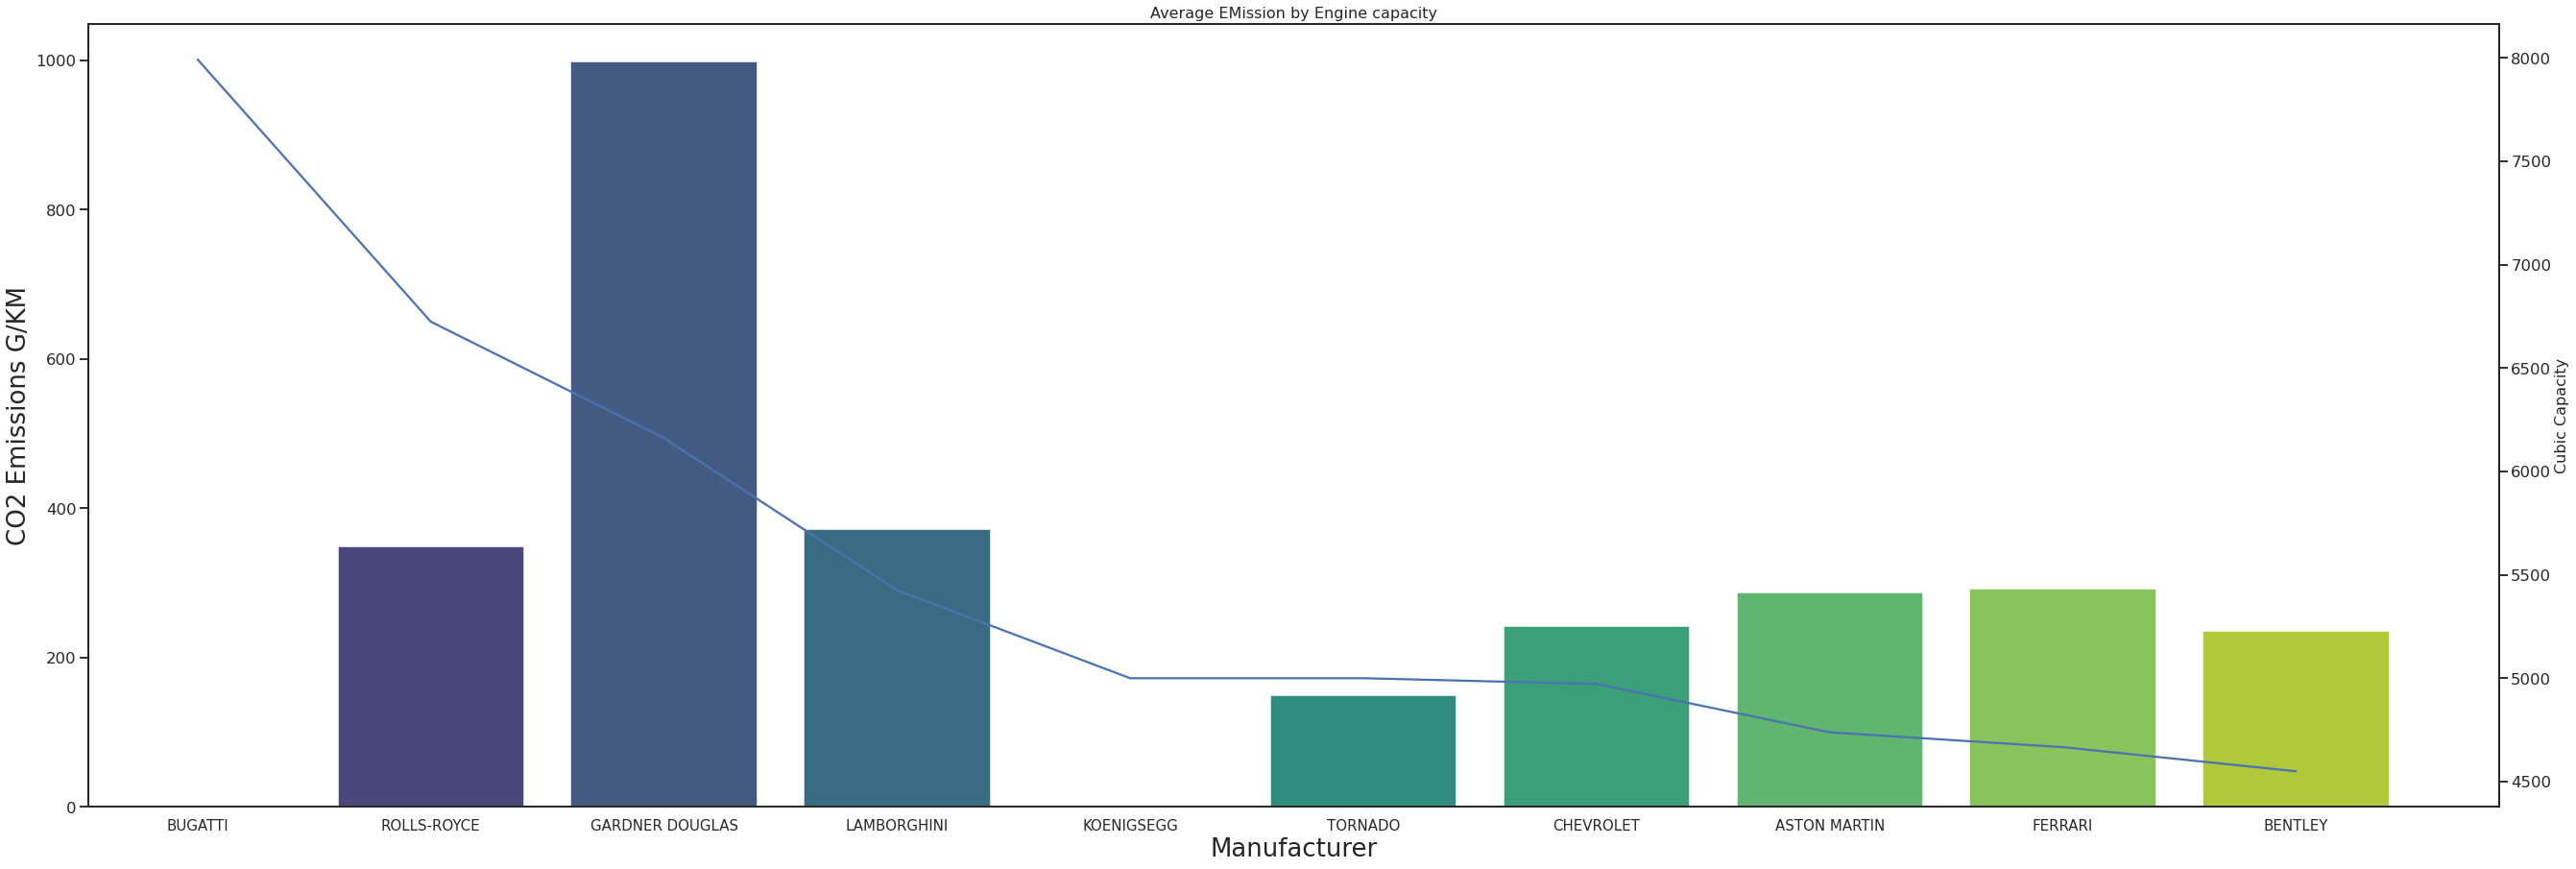

In [377]:
fig, ax1 = plt.subplots(figsize=(45,15))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Average EMission by Engine capacity', fontsize=16)
ax1.set_xlabel('Manufacturer', fontsize=26)
ax1.set_ylabel('CO2 Emissions G/KM', fontsize=26)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='CO2 Emissions G/KM', data = Engine_capacity,palette='viridis')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cubic Capacity', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='Cubic Capacity', data = Engine_capacity, sort=False,palette='viridis')
ax2.tick_params(axis='y')

plt.show()

### Average CO2 Emission by Torque

In [383]:
Torque = pd.pivot_table(data,index=['Manufacturer'], values=["CO2 Emissions G/KM","Torque","Vehicle Type"],
                           aggfunc={'Torque':np.mean,"CO2 Emissions G/KM":np.mean,"Vehicle Type":len})
Torque=Torque.reset_index('Manufacturer')
Torque =Torque.nlargest(10,['Vehicle Type'])
Torque.reset_index(inplace=True)
#make_model_2['Manufacturer_Model'] = make_model_2['Manufacturer'].astype(str) + '_' + make_model_2['Model'].astype(str)
Torque
Torque

,index,Manufacturer,CO2 Emissions G/KM,Torque,Vehicle Type
0,40,MERCEDES-BENZ,144.898810,309.519360,1937
1,4,AUDI,144.268666,281.566569,1705
2,56,SKODA,131.163279,206.633121,1570
3,19,FORD,134.654867,196.032232,1241
4,65,VOLKSWAGEN,130.415110,207.974110,1236
5,6,BMW,138.888664,306.425173,1009
6,64,VAUXHALL,128.772559,200.118119,872
7,54,SEAT,132.817945,197.562274,774
8,32,LAND ROVER,193.505714,369.290456,723
9,49,PEUGEOT,114.514610,206.818830,701


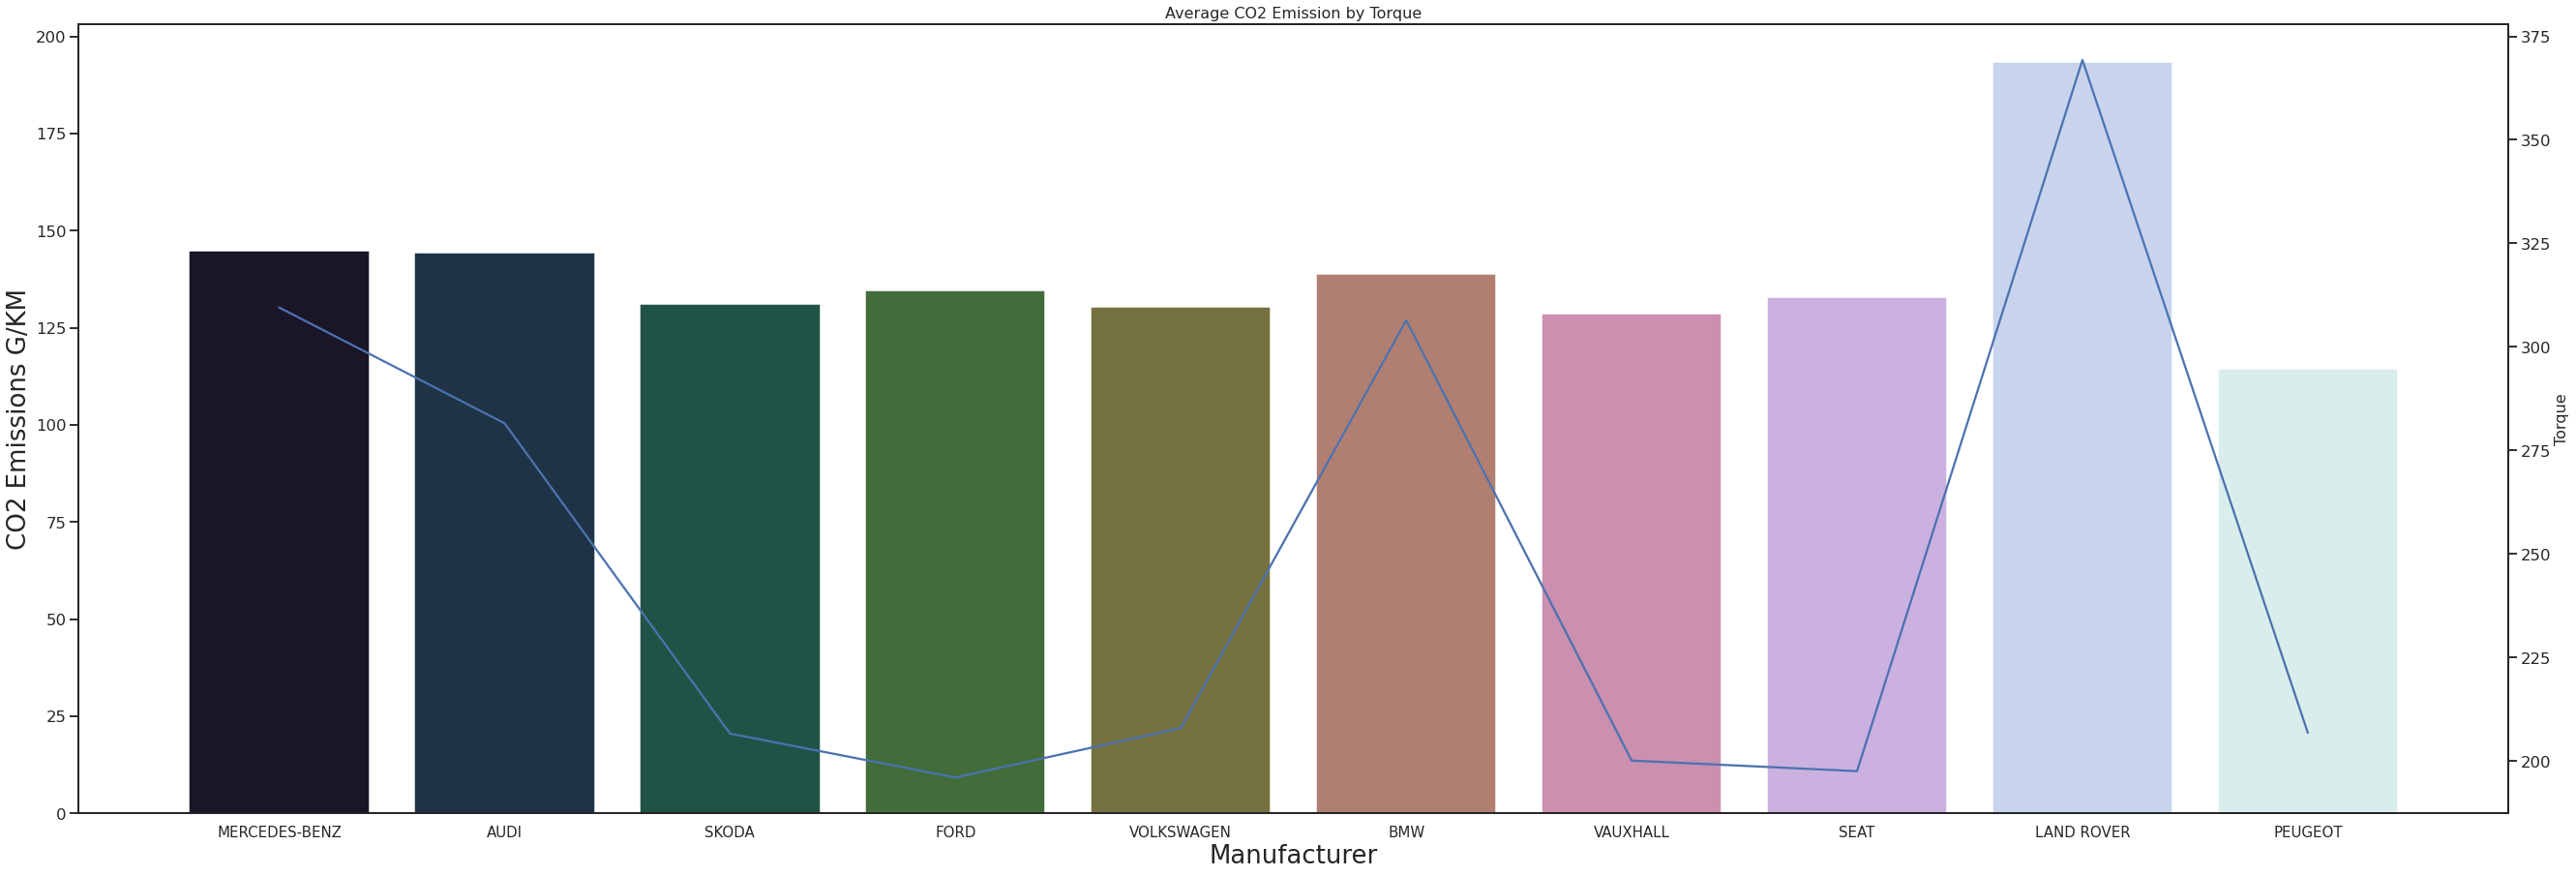

In [387]:
fig, ax1 = plt.subplots(figsize=(45,15))
#color = 'tab:green'
#palette = ['#99ff99','#ffcc99']
ax1.set_title('Average CO2 Emission by Torque', fontsize=16)
ax1.set_xlabel('Manufacturer', fontsize=26)
ax1.set_ylabel('CO2 Emissions G/KM', fontsize=26)
#palette ={"O": "C19", "S": "C16"}
ax2 = sns.barplot(x='Manufacturer', y='CO2 Emissions G/KM', data = Torque,palette='cubehelix')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Torque', fontsize=16)
ax2 = sns.lineplot(x='Manufacturer', y='Torque', data = Torque, sort=False,palette='cubehelix')
ax2.tick_params(axis='y')

plt.show()